In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Define the column names
cols = ["S1", "C1", "S2", "C2", "S3", "C3", "S4", "C4", "S5", "C5", "CLASS"]

df = pd.read_csv('./data/poker-hand-testing.data', names=cols)
df.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


In [2]:
from sklearn.preprocessing import normalize

x = normalize(df.iloc[:, :10])
y = normalize(df.iloc[:, 10:11])

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size=.25)

Decision Tree Classifier

In [4]:
d_tree = DecisionTreeClassifier(
    criterion='entropy', min_samples_leaf=2, min_samples_split=10, max_depth=20, splitter='best')
d_tree.fit(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred = d_tree.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.66      0.73      0.69    125312
         1.0       0.70      0.62      0.66    124688

    accuracy                           0.68    250000
   macro avg       0.68      0.68      0.68    250000
weighted avg       0.68      0.68      0.68    250000



Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 'n_estimators': 200,
#  'min_samples_split': 2,
#  'min_samples_leaf': 1,
#  'max_depth': 40,
#  'criterion': 'entropy',
#  'bootstrap': False}

rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, n_jobs=8,
                            max_depth=40, bootstrap=False, n_estimators=200, min_samples_split=2)

rf.fit(x_train, y_train.ravel())

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=40,
                       n_estimators=200, n_jobs=8)

In [ ]:
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87    125312
         1.0       0.88      0.84      0.86    124688

    accuracy                           0.86    250000
   macro avg       0.86      0.86      0.86    250000
weighted avg       0.86      0.86      0.86    250000



Neural Network

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

cols = ["S1", "C1", "S2", "C2", "S3", "C3", "S4", "C4", "S5", "C5", "CLASS"]

df = pd.read_csv('./data/poker-hand-testing.data', names=cols)
df.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


In [4]:
x_train = df.iloc[:,0:10].values
y_train = df.iloc[:,10].values

x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = tf.keras.utils.to_categorical(y_train)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, input_shape=(10,), kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'],)

h = model.fit(x_train, y_train, epochs=10, batch_size=32)

model.save('model.keras')
print(model.summary())

Epoch 1/10
31250/31250 [==============================] - 22s 696us/step - loss: 0.9693 - accuracy: 0.5286
Epoch 2/10
31250/31250 [==============================] - 23s 745us/step - loss: 0.9124 - accuracy: 0.5753
Epoch 3/10
31250/31250 [==============================] - 25s 793us/step - loss: 0.8766 - accuracy: 0.5965
Epoch 4/10
31250/31250 [==============================] - 23s 749us/step - loss: 0.8705 - accuracy: 0.6002
Epoch 5/10
31250/31250 [==============================] - 23s 724us/step - loss: 0.8690 - accuracy: 0.6009
Epoch 6/10
31250/31250 [==============================] - 26s 838us/step - loss: 0.8678 - accuracy: 0.6018
Epoch 7/10
31250/31250 [==============================] - 23s 747us/step - loss: 0.8671 - accuracy: 0.6020
Epoch 8/10
31250/31250 [==============================] - 22s 717us/step - loss: 0.8666 - accuracy: 0.6022
Epoch 9/10
 7749/31250 [======>.......................] - ETA: 17s - loss: 0.8659 - accuracy: 0.6022

KeyboardInterrupt: 

782/782 [==============================] - 1s 644us/step


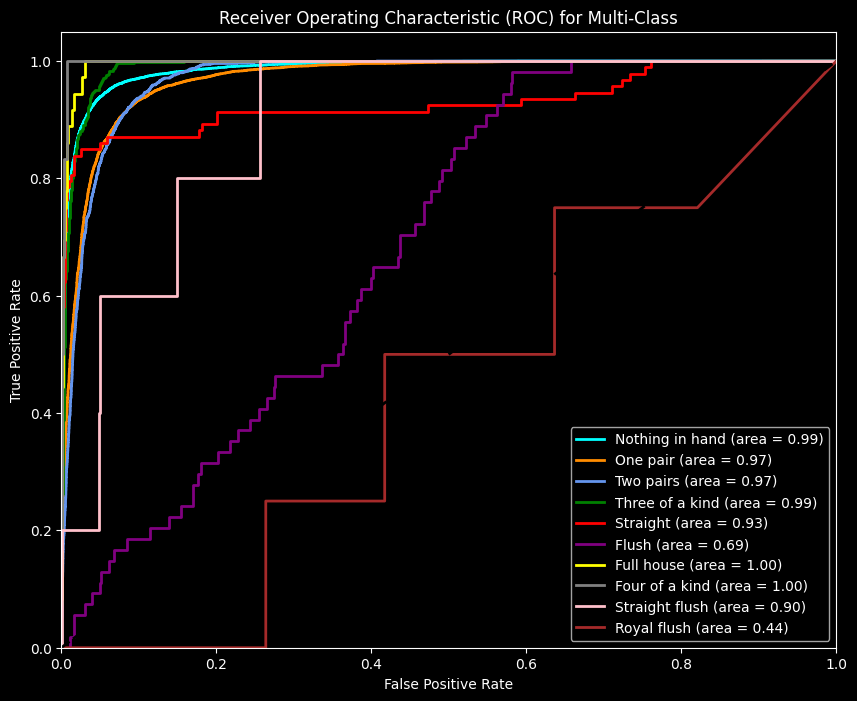

In [3]:
from sklearn.calibration import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle


model = tf.keras.models.load_model('model.keras')

# Load test data
test_data = pd.read_csv('./data/poker-hand-training-true.data')
x_test = test_data.iloc[:, 0:10].values
y_test = test_data.iloc[:, 10].values

# Predict using the model
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Convert labels to one-hot encoding

hand_name = {
    0: 'Nothing in hand',
    1: 'One pair',
    2: 'Two pairs',
    3: 'Three of a kind',
    4: 'Straight',
    5: 'Flush',
    6: 'Full house',
    7: 'Four of a kind',
    8: 'Straight flush',
    9: 'Royal flush',
}

y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'yellow', 'gray', 'pink', 'brown'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='{0} (area = {1:0.2f})'.format(hand_name[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-Class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
features = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'CLASS']
tdata = pd.read_csv('./data/poker-hand-testing.data', names=features)

x_test = tdata.iloc[:,0:10].values
y_test = tdata.iloc[:,10].values

y_test = tf.keras.utils.to_categorical(y_test)

loss, accuracy = model.evaluate(x_test, y_test)

# Convert continuous predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Generate classification report
report = classification_report(y_test_classes, y_pred_classes)

report


31250/31250 [==============================] - 51s 2ms/step - loss: 0.0417 - accuracy: 0.9940


AxisError: axis 1 is out of bounds for array of dimension 1